Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights
Objective: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?
Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?
Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.
Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
Submission: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('/Users/air/ironHack/Course/pandas/labs_week4/amz_uk_price_prediction_dataset.csv')

In [7]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [11]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('bool'), dtype('O'), dtype('int64')]

In [13]:
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [15]:
df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [18]:
df.select_dtypes("object").nunique().sort_values(ascending=False)

asin        2222742
title       2077591
category        296
dtype: int64

In [19]:
df["category"].unique()

array(['Hi-Fi Speakers', 'CD, Disc & Tape Players', 'Wearable Technology',
       'Light Bulbs', 'Bathroom Lighting',
       'Heating, Cooling & Air Quality', 'Coffee & Espresso Machines',
       'Lab & Scientific Products', 'Smart Speakers',
       'Motorbike Clothing', 'Motorbike Accessories',
       'Motorbike Batteries', 'Motorbike Boots & Luggage',
       'Motorbike Chassis', 'Handmade Home & Kitchen Products',
       'Hardware', 'Storage & Home Organisation',
       'Fireplaces, Stoves & Accessories', 'PC Gaming Accessories',
       'USB Gadgets', 'Blank Media Cases & Wallets', 'Car & Motorbike',
       'Boys', 'Sports & Outdoors', 'Microphones', 'String Instruments',
       'Karaoke Equipment', 'PA & Stage',
       'General Music-Making Accessories', 'Wind Instruments',
       'Handmade Gifts', 'Fragrances', 'Calendars & Personal Organisers',
       'Furniture & Lighting', 'Computer Printers', 'Ski Goggles',
       'Snowboards', 'Skiing Poles', 'Downhill Ski Boots',
       'Hiki

In [22]:
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [ ]:
# Part 1: Understanding Product Categories Business Question

In [24]:
frequancy_table = df['category'].value_counts()
proportion_table = df['category'].value_counts(normalize=True)
frequancy_table, proportion_table

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Alexa Built-In Devices                    0.000044
 Motorbike Chassis       

In [26]:
# Identify the Top 5 Product Categories
top_5_categories = frequancy_table.head(5)

print("Top 5 Categories by Listing Frequency:")
top_5_categories

Top 5 Categories by Listing Frequency:


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

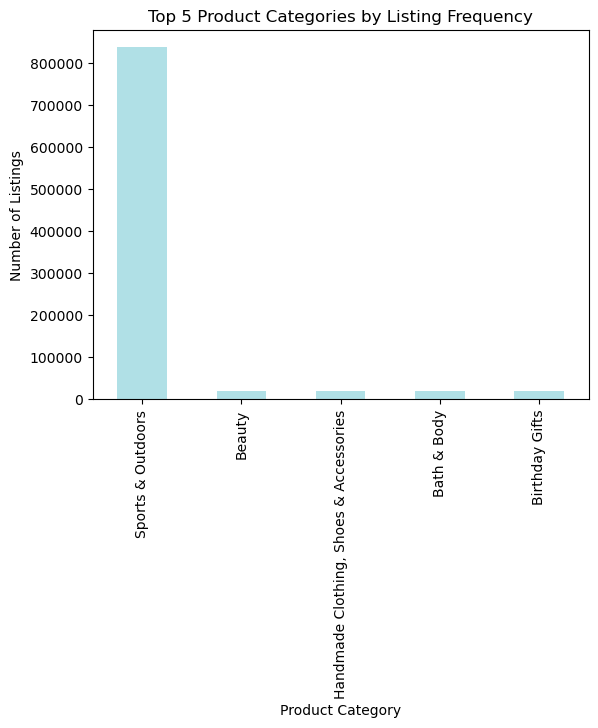

In [28]:
# Bar Chart for Top 5 Categories
top_5_categories.plot(kind='bar', color='powderblue')
plt.title('Top 5 Product Categories by Listing Frequency')
plt.xlabel('Product Category')
plt.ylabel('Number of Listings')
plt.show()

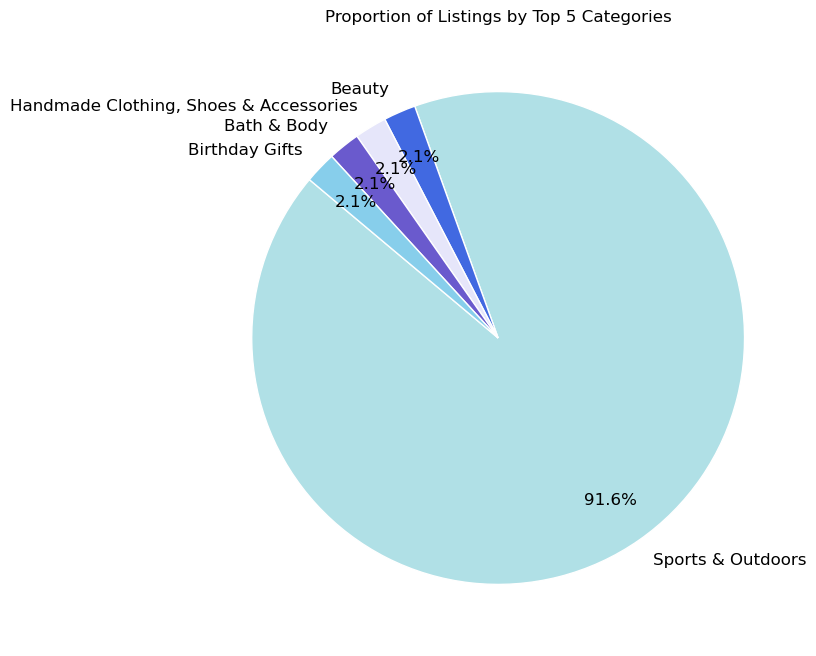

In [30]:
# Pie Chart for Top 5 Categories

plt.figure(figsize=(8, 8))  
top_5_categories.plot(
    kind='pie',
    autopct='%1.1f%%', 
    startangle=140,
    colors=['powderblue','royalblue', 'lavender', 'slateblue', 'skyblue'],
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    pctdistance=0.8,  # Adjust distance to improve readability
    textprops={'fontsize': 12}  # Increase font size for better visibility
)

plt.title('Proportion of Listings by Top 5 Categories')
plt.ylabel('')  
plt.show()

In [ ]:
#From these visualizations, the following insights can be observed:
"""

    >>> Dominance of "Sports & Outdoors" Category:
        The "Sports & Outdoors" category dominates the listings, representing over 90% of the top 5 
        categories' total listings. This dominance suggests that "Sports & Outdoors" 
        might be a highly diverse category with a wide range of products, 
        or it may have exceptionally high demand or popularity among Amazon UK consumers.

    >>> Low Proportions in Other Categories:
        The other categories —"Beauty," "Shoes & Accessories," "Bath & Body," and "Birthday Gifts"—each 
        hold a very small share, around 2.1% of the listings each. These categories have significantly 
        fewer products listed compared to "Sports & Outdoors" indicating that they may be more niche 
        or have less product diversity.

"""

In [32]:
#Part 2: Delving into Product Pricing Business Question: 
df['price'].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [44]:
# the most common price categories (top 20)
common_prices = df['price'].value_counts()
common_prices.head(20)

price
9.99     48922
12.99    38823
8.99     34058
7.99     33632
14.99    32570
6.99     31948
5.99     27818
19.99    27436
11.99    25488
10.99    25172
16.99    24284
13.99    23747
4.99     22438
15.99    21362
3.99     18121
29.99    17487
17.99    16509
18.99    14779
24.99    14364
23.99    14151
Name: count, dtype: int64

In [74]:
my_table = pd.crosstab(index=df['price'],
                       columns="count")
my_table

col_0,count
price,
0.00,20
0.01,694
0.02,7
0.03,2
0.04,13
...,...
22933.42,1
23482.73,1
24674.59,1


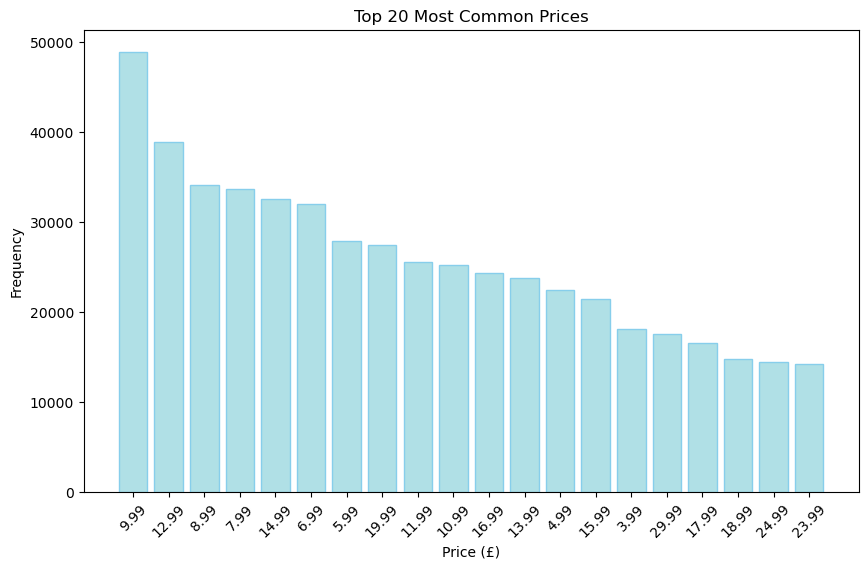

In [108]:
top_20_prices = common_prices.head(20)
plt.figure(figsize=(10, 6))
plt.bar(top_20_prices.index.astype(str), top_20_prices.values, color="powderblue", edgecolor='skyblue')

# Add labels and title
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Prices')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#From these visualizations, the following insights can be observed:
"""
      >>> Amazon UK tends to favor psychological pricing strategies, with many products priced 
      just below round numbers (e.g., £9.99 instead of £10.00). The majority of products are 
      priced in the budget to mid-range segment, under £50, though there are some products 
      with much higher prices in the dataset. 
"""

In [ ]:
# Measures of Centrality:

# Calculate the mean, median, and mode for the price of products. 
# What's the average price point of products listed? 
# How does this compare with the most common price point (mode)? 

In [80]:
mean_price=df['price'].mean()
median_price=df['price'].median()
mode_price=df['price'].mode()[0]

mean_price, median_price, mode_price

"""
Insights:
********

         The discrepancy between the mean (£89.24) and median (£19.09) suggests a right-skewed distribution, 
         where a few high-priced products raise the mean significantly.
         The mode of £9.99 indicates a high concentration of products at this price point, suggesting that 
         Amazon UK has many products in the affordable range. For most customers, the median and mode values are likely 
         more reflective of the price they would encounter, with a majority of products under £20.
         Businesses might leverage these insights to consider pricing strategies. Products priced around the mode or median 
         may appeal more to customers looking for budget-friendly options, while high-end products might require 
         more targeted marketing due to their impact on the overall mean. 
    
"""

(89.24380943923663, 19.09, 9.99)

In [ ]:
# Measures of Dispersion:
# Determine the variance, standard deviation, range, and interquartile range for product price. 
# How varied are the product prices? Are there any indicators of a significant spread in prices? 

In [92]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
#the range where the middle 50% of the product prices lie, 
#helping to identify the spread of the central bulk of prices and any potential outliers outside this range
print("Variance Price, Standard Deviation, Min/Max Price and Range Price: ")
variance_price, std_dev_price, min_price, max_price, range_price

Variance Price, Standard Deviation, Min/Max Price and Range Price: 


(119445.4853225653, 345.6088617535223, 0.0, 100000.0, 100000.0)

In [90]:
q1 = df['price'].quantile(0.25) 
q3 = df['price'].quantile(0.75)
iqr_price = q3 - q1
print("Interquartile Range (IQR):", iqr_price)

Interquartile Range (IQR): 36.0


In [ ]:
# 
"""
Insights:
********
        The variance of product prices is quite high at 119,445.49, indicating a large spread of prices around the mean.
        The standard deviation is also substantial at 345.61, which shows that product prices deviate significantly 
        from the average, reflecting high variability.
        The range is very wide with a minimum price of 0.0 and a maximum price of 100,000.0, which suggests the dataset 
        includes some extremely high-priced items, likely contributing to the large variance and standard deviation.
        Interquartile Range (IQR): The IQR of 36.0 shows that the middle 50% of prices lie within a narrower range, 
        between the 25th and 75th percentiles. This indicates that while most prices are relatively clustered, 
        there are some extreme values (outliers) on the higher end.

"""

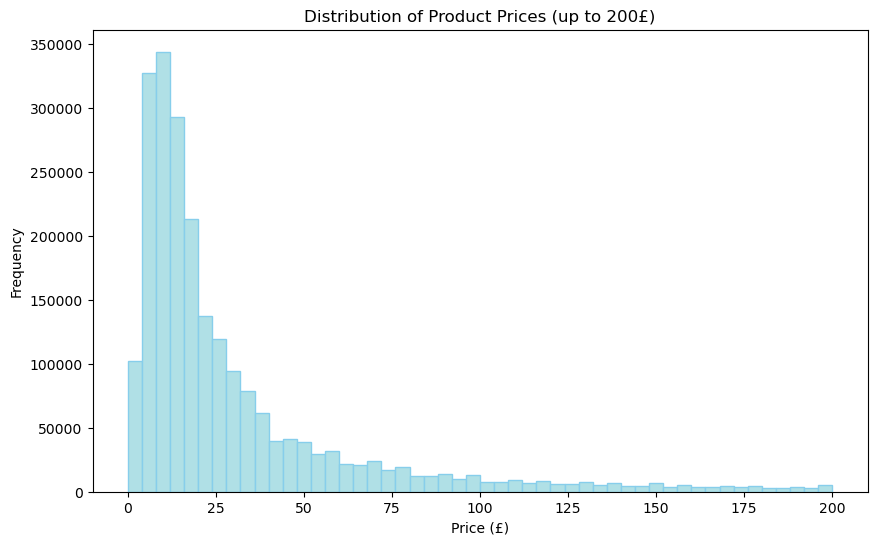

In [126]:
# Visualizations:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, range=(0, 200), color='powderblue', edgecolor='skyblue')  
plt.title("Distribution of Product Prices (up to 200£)")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.show()

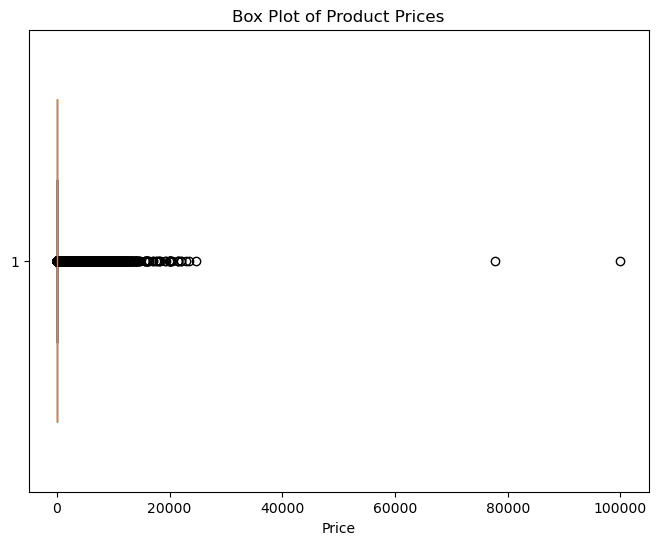

In [124]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'], vert=False, patch_artist=True, widths=0.7)
plt.title("Box Plot of Product Prices")
plt.xlabel("Price")
plt.show()

In [ ]:
#Insights of visualisation:
"""
             >>> Common Price Ranges
             Based on the statistics, most products likely fall within a lower price range (within the IQR of 36.0), 
             while a small number of products are priced significantly higher, skewing the mean and creating high variance. 
             These high-priced products are outliers in the distribution.

             >>> Insights from the Histogram
             It focuses on prices up to 200£, which likely contains most of the products based on the IQR. 
             Adjusting the range makes it easier to interpret, as including all prices (up to 100,000£) 
             would create a long tail and obscure details in the lower price range.

             >>> Insights from the Box Plot

             The box plot will likely show a narrow interquartile range (the central box) with a few very high outliers 
             beyond the whiskers, indicating that most products are priced within a lower range, 
             while a few outliers have very high prices.
             

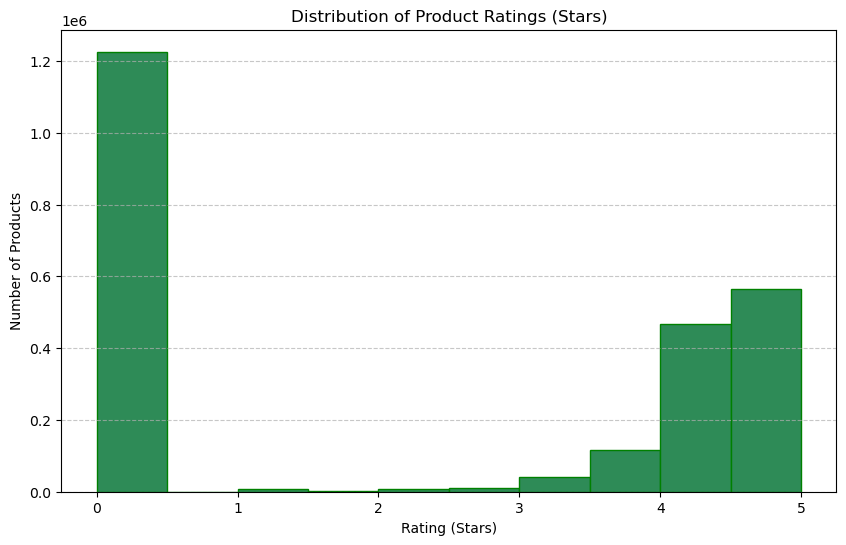

In [132]:
plt.figure(figsize=(10, 6))
plt.hist(df['stars'], bins=10, color='seagreen', edgecolor='green')
plt.title('Distribution of Product Ratings (Stars)')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Products')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
#### Summary Conclusions:


    # [1] Dominance of "Sports & Outdoors" Category: The "Sports & Outdoors" category overwhelmingly leads Amazon UK's listings, 
    # representing over 90% of the top 5 categories. This suggests high diversity or demand within this category compared 
    # to other more niche categories like "Beauty" and "Birthday Gifts," which each hold a modest 2.1% share.

    # [2]Product Pricing Skewness: Most products fall within the affordable range, with the mode price at £9.99 and median at £19.09, 
    # reflecting Amazon's use of psychological pricing in the budget to mid-range segment. However, the mean price is significantly 
    # higher at £89.24 due to a few high-priced outliers, creating a right-skewed distribution and high variability.

    # [3] Wide Price Range with Outliers: The dataset shows a broad price range (up to £100,000), contributing to high variance 
    # and standard deviation. The Interquartile Range (IQR) of £36 suggests that most prices are clustered within this range, 
    # while a few extreme outliers drive the overall mean upward. Visual tools like a focused histogram (up to £200) 
    # and box plot bshowcase these clusters and outliers for clearer analysis.
